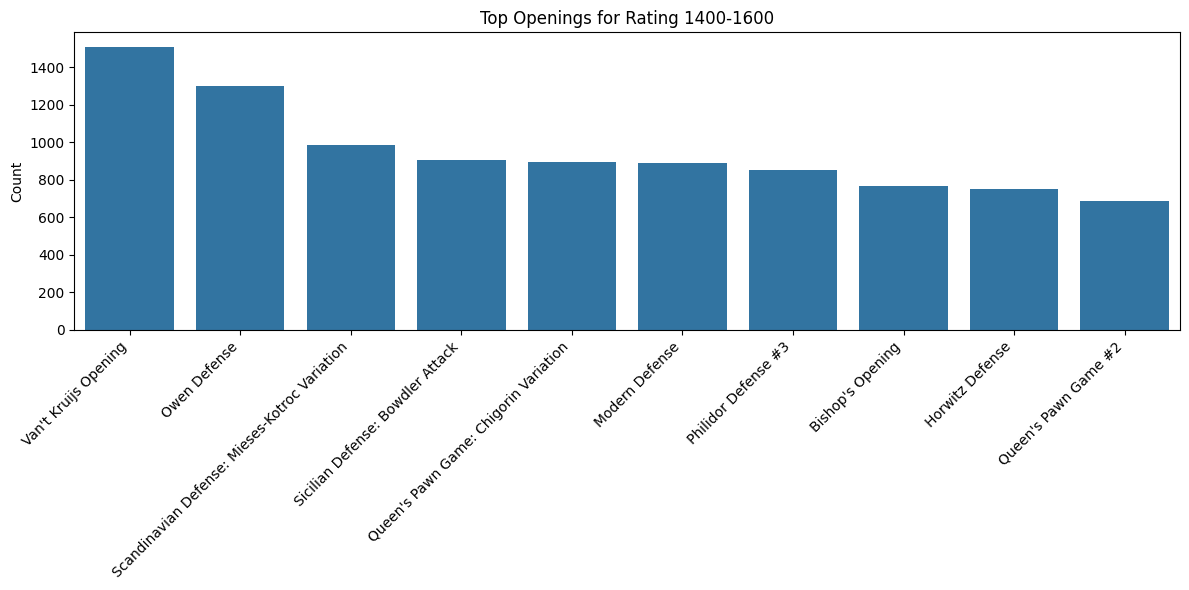

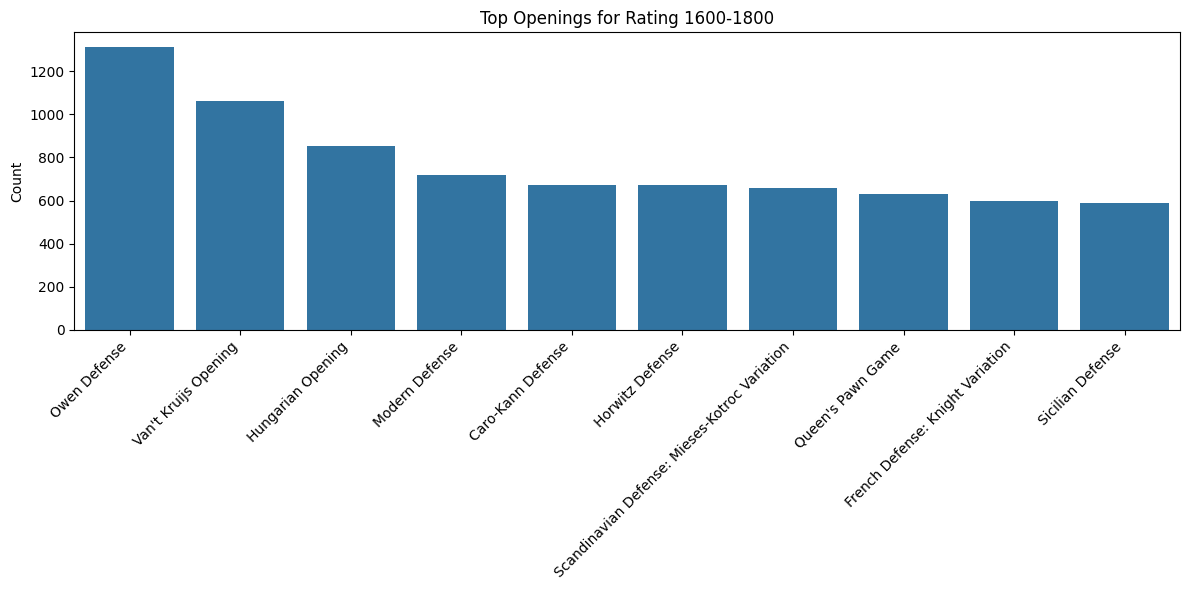

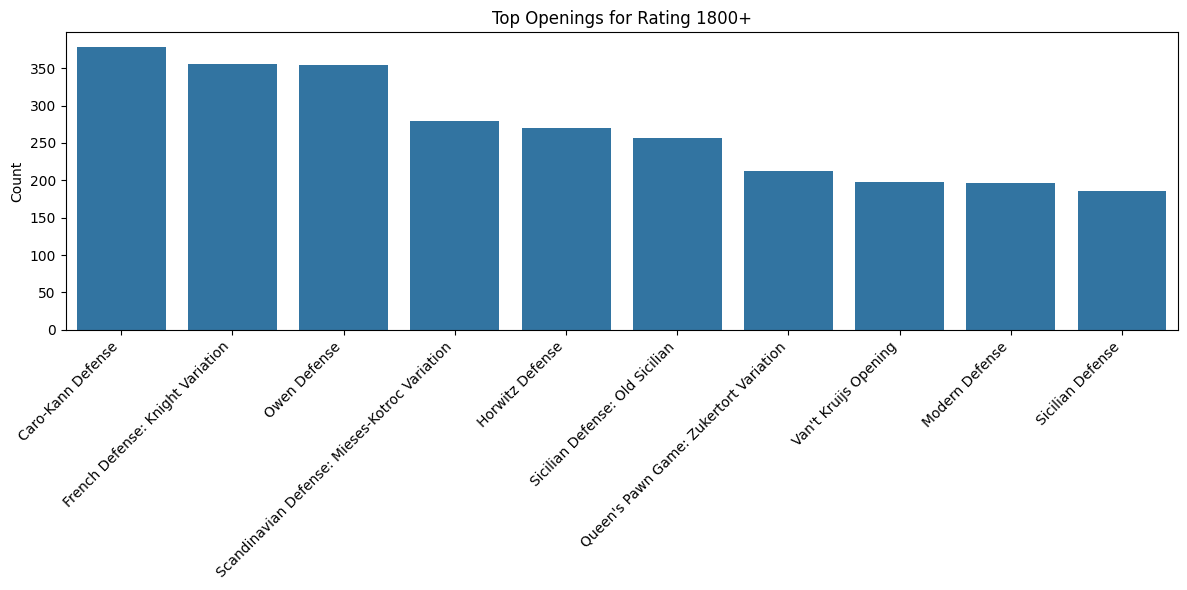

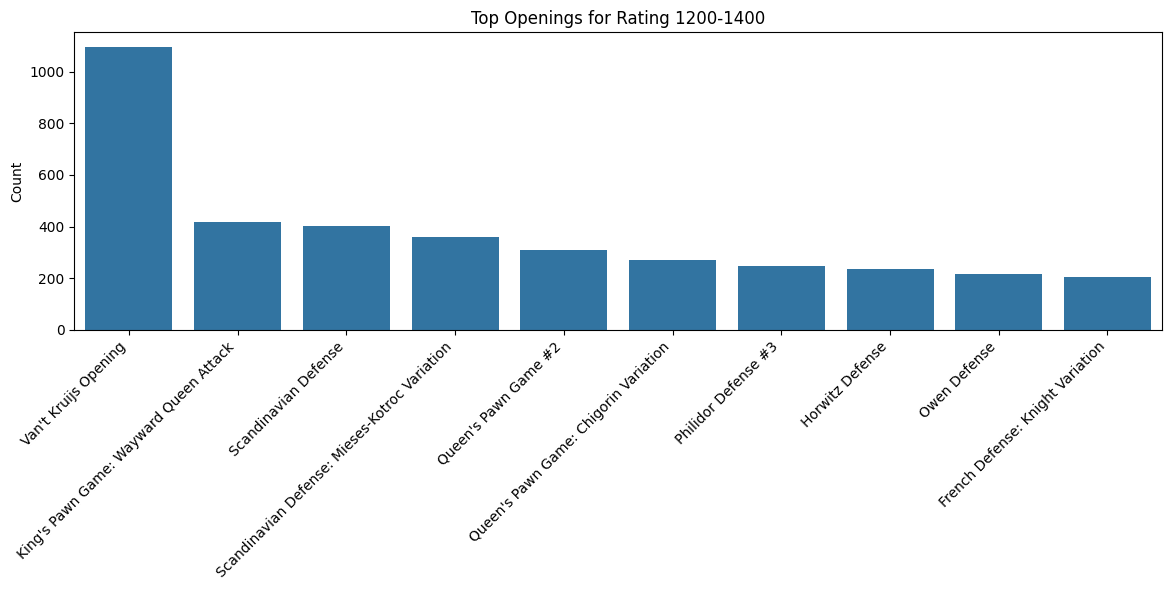

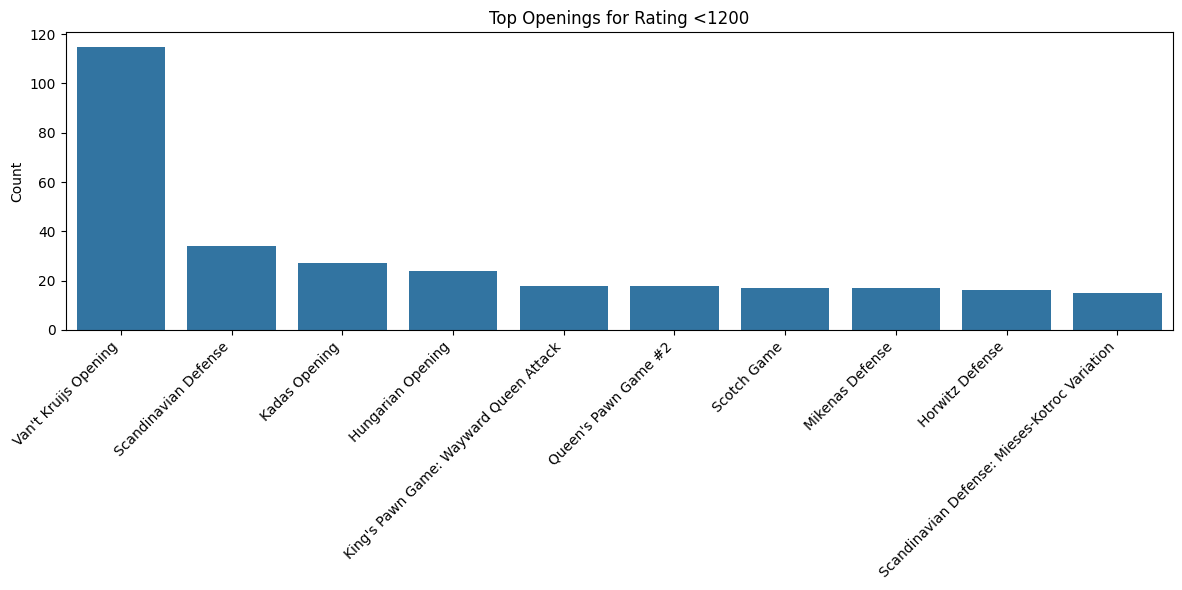

In [2]:
import re
from collections import defaultdict
from heapq import nlargest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to parse a single game's metadata
def parse_game(game):
    ratings = re.findall(r'\[WhiteElo "(\d+)"\]\s*\[BlackElo "(\d+)"\]', game)
    openings = re.findall(r'\[Opening "(.*?)"\]', game)
    if ratings and openings:
        white_rating, black_rating = map(int, ratings[0])
        opening = openings[0]
        avg_rating = (white_rating + black_rating) // 2
        return avg_rating, opening
    return None, None

# Function to determine the rating range
def get_rating_range(avg_rating):
    if avg_rating < 1200:
        return "Rating_<1200"
    elif avg_rating <= 1400:
        return "Rating_1200-1400"
    elif avg_rating <= 1600:
        return "Rating_1400-1600"
    elif avg_rating <= 1800:
        return "Rating_1600-1800"
    else:
        return "Rating_1800+"

# Initialize data structure for counting openings in rating ranges
rating_range_openings = defaultdict(lambda: defaultdict(int))

# Read and parse the PGN file
with open("C:/Users/Dylan Patel/Desktop/Data science/chess/data/original_lichess.pgn", "r") as file:
    pgn_data = file.read()

# Split the file into individual games
games = pgn_data.strip().split("\n\n")

# Process each game
for game in games:
    avg_rating, opening = parse_game(game)
    if avg_rating and opening:
        rating_range = get_rating_range(avg_rating)
        rating_range_openings[rating_range][opening] += 1

# Keep only the top 10 openings for each rating range
top_openings_per_rating_range = {
    rating_range: dict(nlargest(10, openings.items(), key=lambda x: x[1]))
    for rating_range, openings in rating_range_openings.items()
}


# Convert the top openings data to a DataFrame for visualization
rows = []
for rating_range, openings in top_openings_per_rating_range.items():
    for opening, count in openings.items():
        rows.append({"Rating Range": rating_range, "Opening": opening, "Count": count})

df = pd.DataFrame(rows)


# Create a separate plot for each rating range
for rating_range in df['Rating Range'].unique():
    subset = df[df['Rating Range'] == rating_range]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=subset, x='Opening', y='Count')
    
    rating_range = rating_range.replace("_", ' ')
    plt.title(f"Top Openings for {rating_range}")
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate opening names for better readability
    plt.xlabel("")  # Remove x-axis label
    plt.ylabel("Count")
    plt.tight_layout()
    # Replace invalid characters in the rating range for the filename
    sanitized_rating_range = rating_range.replace(' ', '_').replace('<', 'lt').replace('>', 'gt')
    #plt.savefig(f"Top_Openings_{sanitized_rating_range}.png")  # Save the plot with a valid filename
    plt.show()